## Python Fundamentals
A few basics before diving into the machine learning.

> Since everything in Python is an object it usually consists of a instance of one of the following:

### Data Types
* **Numeric**: int, float, or complex. Int and float are self explained. Complex is defined as: Complex number is represented by complex class. It is specified as (real part) + (imaginary part)j. For example – 2+3j

* **Sequence Type** - sequence is the ordered collection of similar or different data types. These are `strings`, `lists`, `tuples`. Strings can be in single, double, or tripple quotes. Lists are basically JS arrays. Tuples are basically immutable arrays but they are created with `()` instead of bracket syntax like lists / arrays are.
* **Boolean**: Booleans equal either `True` or `False`. Note the capital initial letter.
* **Set**: Set's are unordered collections of iterable data that has no duplicates. Set's **cannot** be accessed by index but must be accessed via looping (for in loops) or you can ask if a value is present in a set using the `in` keyword like so: `print("Geeks" in set1)`.
* **Dictionary**: Basically syntacticly and functionally the same as a JavaScript object. One difference between JS and Python though is keys for dictionaries can also be numbers. Dictionaries are accessed via bracket syntax or by calling their `.get` method and passing it the key.

> Most of the data types above support shorthand literal syntax but also have constructor type methods like: `set, dict, tuple, ect.. 


### Noteworty
- Python's equivilent to JavaScript's `typeof` keyword is the `type` method.
- Function / method signatures are not in order but rather defined by `keyword=value` syntax.
- Slicing a list in python returns a new list from the existing list. Syntax is List[startIdx:endIndex:indexJump] IE. firstFiveTrainingElements = Train[0:5] Read more here: https://www.geeksforgeeks.org/python-list-slicing/


### Noteable Packages in this project and their high points:
1. **numpy**  - used for working with numbers. Abbreviated in this project as np.
2. **pandas** - Is a framework for working with and anylizinfg data. It's used to create `dataframes`, series and other constructs.
**Pandas data types are**:
* Series: One dimensional labeled array.
* DataFrame: 2D data set. Think rows and columns. Here is how to delete columns from a data frame: https://pandas.pydata.org/docs/user_guide/dsintro.html#column-selection-addition-deletion. Dataframes have a `transpose` method which is also exposed as the `.T` property. Calling it will output the dataframe as a table of row and columns.


In [1]:
# S1. Import libraries fro handling data
# Data / Math imports
import numpy as np
import pandas as pd

# Visualization Imports
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libs
import time
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Create a onehotencoder object that relables columns after transforming
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

In [3]:
# DEFINE FUNCTION TO READ FILES FROM GITHUB REPOS
# Returns a pandas object
def read_file(url):

    """
    Takes GitHub url as an argument,
    pulls CSV file located @ github URL.

    """

    url = url + "?raw=true"
    df = pd.read_csv(url)
    return df



In [4]:
# Test Data - READ FILE FROM GITHUB REPO
url = "https://github.com/john-adeojo/AdvancedRegression/blob/main/test.csv"
Test = read_file(url)

# Training Data - READ ASTRONAUT MISSION FILE FROM GITHUB
url = "https://github.com/john-adeojo/AdvancedRegression/blob/main/train.csv"
Train = read_file(url)
Train.head()

# Outputs Test (1459, 80) Train (1460, 81)
print("Test", Test.shape, "Train", Train.shape)

Test (1459, 80) Train (1460, 81)


> To Debug in vscdode just click in the frame to the left of the column that you want to debug, then click the play dropdown in the frame and select debug instead of play and it will stop at the breakpoint. Then you can use standard debugging tools and built in vscode goodies.

In [63]:
# S3. Data Wrangling
print("Rows     : ", Train.shape[0])
print("Columns  : ", Train.shape[1])
print("\nFeatures : \n", Train.columns.tolist())
print("\nMissing values :  ", Train.isnull().sum().values.sum())
print("\nUnique values :  \n", Train.nunique())

print("S3. Test", Test.shape, "Train", Train.shape)
print(Test.transpose())

                                          0     \
Id                                        1461   
MSSubClass     1-STORY 1946 & NEWER ALL STYLES   
MSZoning                                    RH   
LotFrontage                               80.0   
LotArea                                  11622   
Street                                    Pave   
Alley                          No alley access   
LotShape                                   Reg   
LandContour                                Lvl   
Utilities                               AllPub   
LotConfig                               Inside   
LandSlope                                  Gtl   
Neighborhood                             NAmes   
Condition1                               Feedr   
Condition2                                Norm   
BldgType                                  1Fam   
HouseStyle                              1Story   
OverallQual                            Average   
OverallCond                      Above Average   


In [6]:
# debugging cell - %debug sets a jupyter notebooks breakpoint using the vscode extensions
# %debug

In [57]:
# S4. Get a summary of all features ( data variables that influence outcomes, IE. comp sale prices, sq ft, # bedrooms, # bathrooms, ect.. ) 
# in the data and their types

# Train.info() # Gives a description of the columns and their data type, basically schema type info.

# better way of viewing the data in a row / column format. More anagalous of doing a select * 
Train.T # Each row is a feature / attribute and each column is a element of the dataset. or Train.transpose()

# Here is how to index items in a dataframe: https://pandas.pydata.org/docs/user_guide/dsintro.html#indexing-selection
# select a row: `df.loc[label]` - returns a series 
# row1 = Train.loc[0]
# print(row1)

# Select a row by integer location
# row1 = Train.iloc[0]
# print(row1)

# > in this case our labels are also integers so we can use bracket or iloc syntax for the same output.

# Slice rows
print(Train[5:10])

# Select a column: df[col] - returns a series
# print(Train["Id"])


   Id                                 MSSubClass MSZoning  LotFrontage  \
5   6              1-1/2 STORY FINISHED ALL AGES       RL         85.0   
6   7            1-STORY 1946 & NEWER ALL STYLES       RL         75.0   
7   8                       2-STORY 1946 & NEWER       RL          0.0   
8   9              1-1/2 STORY FINISHED ALL AGES       RM         51.0   
9  10  2 FAMILY CONVERSION - ALL STYLES AND AGES       RL         50.0   

   LotArea Street            Alley LotShape LandContour Utilities LotConfig  \
5    14115   Pave  No alley access      IR1         Lvl    AllPub    Inside   
6    10084   Pave  No alley access      Reg         Lvl    AllPub    Inside   
7    10382   Pave  No alley access      IR1         Lvl    AllPub    Corner   
8     6120   Pave  No alley access      Reg         Lvl    AllPub    Inside   
9     7420   Pave  No alley access      Reg         Lvl    AllPub    Corner   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
5       Gt

In [8]:
# Remove duplicates from training data
Train.duplicated(subset=None, keep="first")
print("S4. Test", Test.shape, "Train", Train.shape)

S4. Test (1459, 80) Train (1460, 81)


In [9]:
# S5. next I'll check for missing values in training data
pd.options.display.min_rows = 115
Train.isnull().sum().sort_values(ascending=False)
print("S5. Missing info - Test", Test.shape, "Train", Train.shape)


S5. Missing info - Test (1459, 80) Train (1460, 81)


In [10]:
# S6. Decide how to handle data holes - Lets get info on the missing values and decide what we will do with them
missing = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "LotFrontage",
    "GarageCond",
    "GarageType",
    "GarageYrBlt",
    "GarageFinish",
    "GarageQual",
    "BsmtExposure",
    "BsmtFinType2",
    "BsmtFinType1",
    "BsmtCond",
    "BsmtQual",
    "MasVnrArea",
    "MasVnrType",
    "Electrical",
]

Train[missing].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageCond    1379 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

In [11]:
# Create a map to tell the code what to substitute for values when they're null / undefined / missing.
# Assume poolQC missing values are due to property not having pool (which makes sense for the data )
values = {
    "PoolQC": "No Pool",
    "MiscFeature": "No Feature",
    "Alley": "No alley access",
    "Fence": "No Fence",
    "FireplaceQu": "No Fireplace",
    "GarageCond": "No Garage",
    "GarageType": "No Garage",
    "GarageArea": 0,
    "GarageYrBlt": "None built",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "BsmtExposure": "No Basement",
    "BsmtFinType2": "Not Applicable",
    "BsmtFinType1": "Not Applicable",
    "BsmtCond": "No Basement",
    "BsmtQual": "No Basement",
    "MasVnrArea": 0,
    "MasVnrType": "No Veneer",
    "LotFrontage": 0,
}

In [12]:
# Fill in the missing data and sort it
Train.fillna(value=values, inplace=True)
Test.fillna(value=values, inplace=True)

Train.isna().sum().sort_values(ascending=False)

Electrical       1
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
Id               0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
                ..
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
LotArea          0
LotFrontage      0
MSZoning         0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
BsmtCond         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinType2     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtExposure     0
BsmtQual         0
RoofMatl    

In [13]:
# for other missing categories we will replace with the mode
features = Train.select_dtypes(include=["object"]).columns

for features in features:
    Train[features].fillna(Train[features].mode()[0], inplace=True)
    Test[features].fillna(Test[features].mode()[0], inplace=True)


In [14]:
# Finish filling and replacing other data
# some basement values are set to NANs when they should be zero
Basementmetrics = [
    "BsmtHalfBath",
    "BsmtFullBath",
    "BsmtFinSF1",
    "GarageCars",
    "TotalBsmtSF",
    "BsmtUnfSF",
    "BsmtFinSF2",
]

for Basementmetrics in Basementmetrics:
    Test.loc[(Test[Basementmetrics].isnull()), Basementmetrics] = 0
    Train.loc[(Train[Basementmetrics].isnull()), Basementmetrics] = 0

# mising info for Garage cars should be replaced
Test.loc[(Test.GarageCars.isnull()), "GarageCars"] = 0
Train.loc[(Train.GarageCars.isnull()), "GarageCars"] = 0
print("S6. Test", Test.shape, "Train", Train.shape)


S6. Test (1459, 80) Train (1460, 81)


In [15]:
# Data normalization cont'd - Little more substitution and some variable type casting
# S7. Normalize Data - Change variable types

# Year built is currently an integer we should treat this as a category for the purpose of this task
Train.YearBuilt = Train.YearBuilt.astype(str)
Test.YearBuilt = Test.YearBuilt.astype(str)

Train.YrSold = Train.YrSold.astype(str)
Test.YrSold = Test.YrSold.astype(str)

Train.GarageYrBlt = Train.GarageYrBlt.astype(str)
Test.GarageYrBlt = Test.GarageYrBlt.astype(str)

Train.YearRemodAdd = Train.YearRemodAdd.astype(str)
Test.YearRemodAdd = Test.YearRemodAdd.astype(str)


# MSSUbCLass, Overallcond & OverallQual: we will decode this to avoid numeric mix-up
MSSUbCLass = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}


OverallQualCond = {
    10: "Very Excellent",
    9: "Excellent",
    8: "Very Good",
    7: "Good",
    6: "Above Average",
    5: "Average",
    4: "Below Average",
    3: "Fair",
    2: "Poor",
    1: "Very Poor",
}


Train.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)
Test.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)

print("S7. Test", Test.shape, "Train", Train.shape)

S7. Test (1459, 80) Train (1460, 81)


In [16]:

# S8. EDA - Exploratory Data Analysis
# Explore the shape of the data to make sure it looks correct, there are no abnormalities or surprises.
pd.set_option("display.max_columns", None)
Train.describe()

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    57.623288   10516.828082   103.117123   443.639726   
std     421.610009    34.664304    9981.264932   180.731373   456.098091   
min       1.000000     0.000000    1300.000000     0.000000     0.000000   
25%     365.750000    42.000000    7553.500000     0.000000     0.000000   
50%     730.500000    63.000000    9478.500000     0.000000   383.500000   
75%    1095.250000    79.000000   11601.500000   164.250000   712.250000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      3.409589    15.060959     2.758904     43.489041     6.321918   
std      29.317331    55.757415    40.177307    496.123024     2.703626   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     5.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.0

Showing sales price hist...


/Users/pbarrick/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


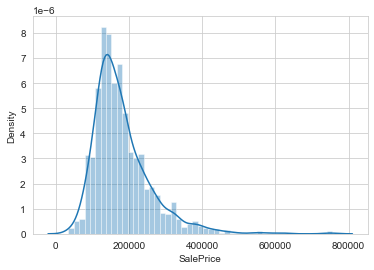

In [17]:
# S9. EDA Visualization
def showHist(): 
    print("Showing sales price hist...")
    # Sales Price Histogram
    x = Train.SalePrice
    sns.set_style("whitegrid")
    sns.distplot(x)
    
    plt.show()

showHist()

Showing flattened sales price hist...


/Users/pbarrick/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


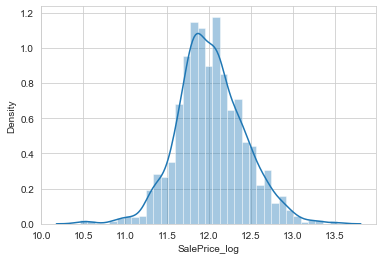

In [18]:
# Meant to minimize Rsq loss - https://www.instapaper.com/read/1469273676 ( minimising squared error )
# Basically  converts to 10's instead of 000's to make the price spread more narrow and the results more focused
# This needs to run bc it sets the Training data SalePrice_log property
def showFlattnedHist():
    print("Showing flattened sales price hist...")
    Train["SalePrice_log"] = np.log(Train.SalePrice)
    x = Train.SalePrice_log
    sns.distplot(x)
    plt.show()

showFlattnedHist()

showing heatmap...


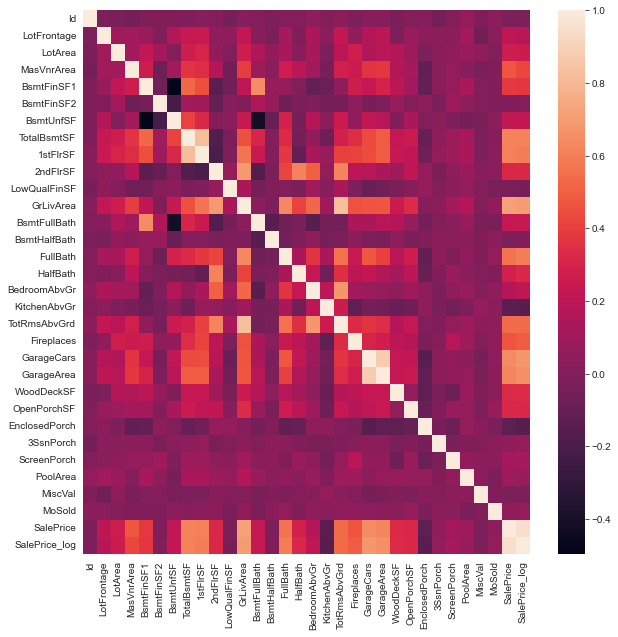

In [19]:
# S10. Correlations in dataset via heatmap - Lets explore the correlations in our data set
def showHeatmap():
    print("showing heatmap...")
    plt.figure(figsize=(10, 10))
    sns.heatmap(Train.corr())
    plt.savefig("pearsonsmep.png")
    plt.show()

showHeatmap()

In [20]:
# S11. Transform the data and prep it for ML
# Wrapper for one hot encoder to allow labelling of encoded variables

class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns

<Figure size 720x720 with 0 Axes>

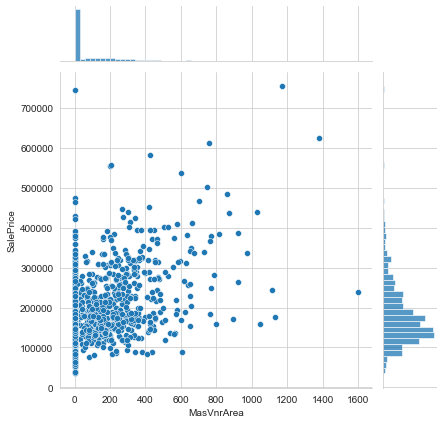

<Figure size 720x720 with 0 Axes>

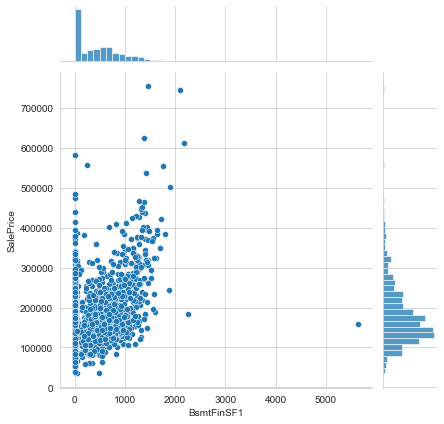

<Figure size 720x720 with 0 Axes>

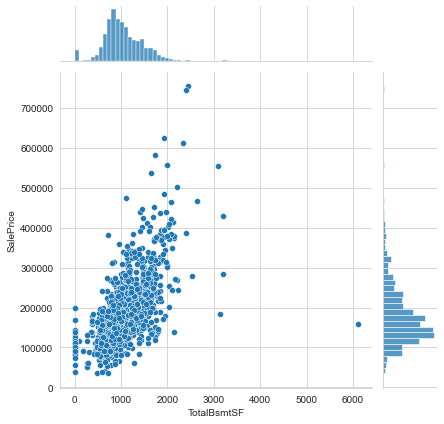

<Figure size 720x720 with 0 Axes>

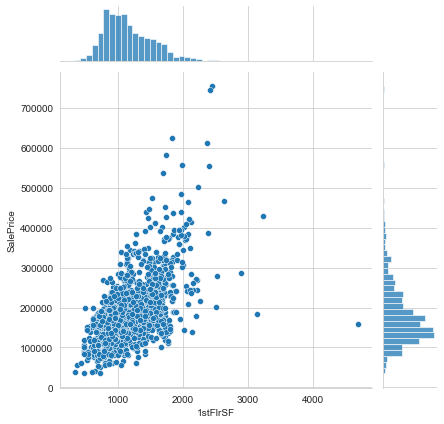

<Figure size 720x720 with 0 Axes>

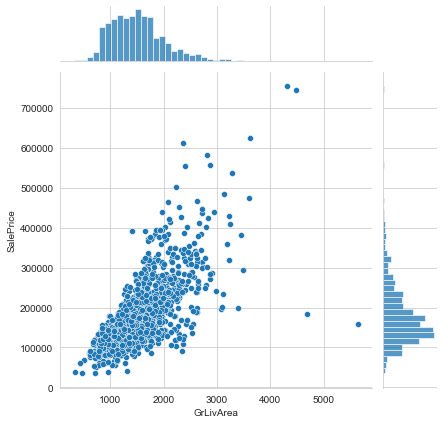

<Figure size 720x720 with 0 Axes>

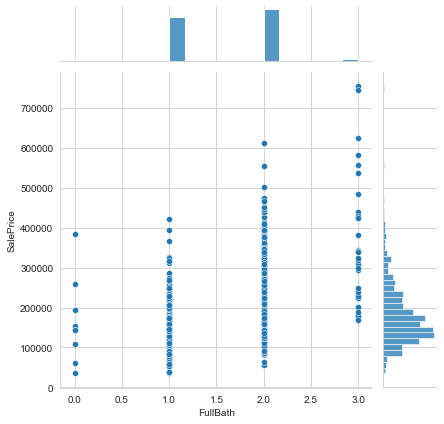

<Figure size 720x720 with 0 Axes>

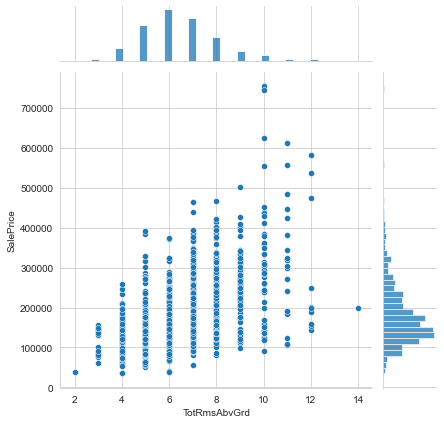

<Figure size 720x720 with 0 Axes>

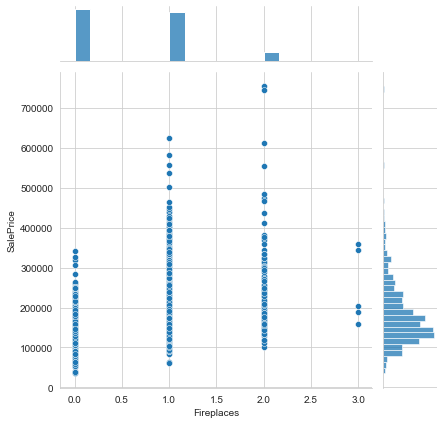

<Figure size 720x720 with 0 Axes>

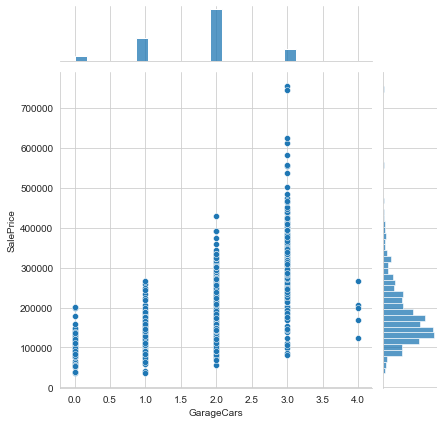

<Figure size 720x720 with 0 Axes>

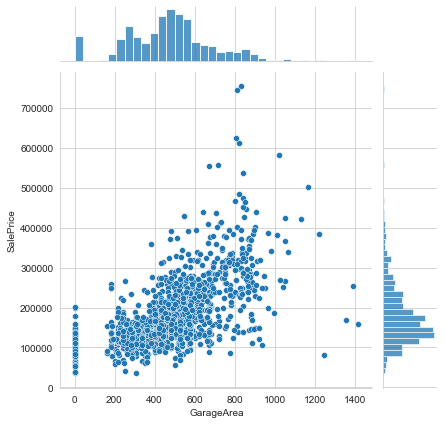

<Figure size 720x720 with 0 Axes>

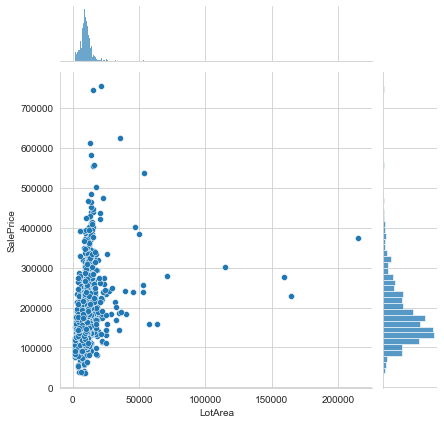

<Figure size 720x720 with 0 Axes>

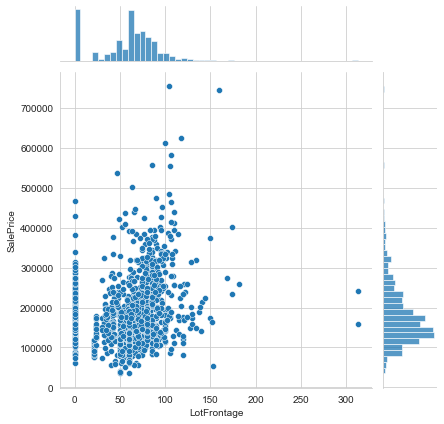

In [21]:

# S12. Explore the data a bit more
# We will plot some joint histogram and scatter grphs to look at correlated features in more detail
y = Train.SalePrice

def plotFeaturesForPrice():
    features = [
        "MasVnrArea",
        "BsmtFinSF1",
        "TotalBsmtSF",
        "1stFlrSF",
        "GrLivArea",
        "FullBath",
        "TotRmsAbvGrd",
        "Fireplaces",
        "GarageCars",
        "GarageArea",
        "LotArea",
        "LotFrontage",
    ]

    for features in features:
        sns.set_style("whitegrid")
        plt.figure(figsize=(10, 10))
        x = Train[features]
        sns.jointplot(x=x, y=y, data=Train)
        
        plt.show()

plotFeaturesForPrice()

In [22]:
# S13.
# Define funtion to encode categorrical variables with and rejoin to initial data
# Converts categorical data into numbers and puts it back in the original data set
def transform(Train, df):

    # isolate categorical features
    cat_columns = df.select_dtypes(include=["object"]).columns
    cat_df = df[cat_columns]

    # isolate the numeric features
    numeric_df = df.select_dtypes(include=np.number)

    # initialise one hot encoder object spcify handle unknown and auto options to keep test and train same size
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    # Fit the endcoder to training data
    ohe.fit(Train[cat_columns])

    # transform input data
    df_processed = ohe.transform(cat_df)

    # concatinate numeric features from orginal tables with encoded features
    df_processed_full = pd.concat([df_processed, numeric_df], axis=1)

    return df_processed_full

In [23]:

# Get transformed Training data ( Training data with categorical data mapped to numbers )
Train_encoded = transform(Train, Train)

# Get transformed test data ( test data with categorical data mapped to numbers )
Test_encoded = transform(Train, Test)

# Check data sets are same width minus the two labels in Train
print("Test", Test_encoded.shape, "Train", Train_encoded.shape)

Test (1459, 607) Train (1460, 609)


In [24]:
# S12. Begin ML with SciKit and the Random Forrest Model
# Model 1: Ranbdom Forest Rgressor

# Split training data into features (x_train) and labels (Y_train)
x_train = Train_encoded.drop(columns=["Id", "SalePrice", "SalePrice_log"])
Y_train = Train_encoded.SalePrice_log

# Creating  scikit GridSearch
Now that we have the data, we are going to create a grid search. The docs for scikit.model_selection describe this type of model as `Exhaustive search over specified parameter values for an estimator`. The basic idea is you `fit` the formatted data to this model and then you call `predict` on it. Let's take a tour of the documenation now:

`GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.`

## Signature
`class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]`

### Parameter breakdown
**estimator - dict or list of dictionaries**: This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a `score function`, or `scoring must be passed`.

**param_grid - dict or list of dictionaries**: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

**scoring - str, callable, list, tuple or dict, default=None**: Strategy to evaluate the performance of the cross-validated model on the test set. There are many types of scoring availible, depending on the problem you're trying to solve. A list of those can be found here: https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values. In our case we are using `neg_root_mean_squared_error` which is mean squared error regression loss. Documentation on that can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn-metrics-mean-squared-error

**n_jobs - int**: number of jobs to run in parallel
**refit - bool, str, or callable, default=True**: Refit an estimator using the best found parameters on the whole dataset.
**cv - int, cross-validation generator or an iterable, default=None**: Determines the cross-validation splitting strategy. In our case we used an integer of 5.
**verbose - int**: Controls verbosity of output, higher the verbosity the more output. Goes from 1 - 3.
**pre_dispatch - int**: Controls the number of jobs that get dispatched during parallel execution.
**error_score - ‘raise’ or numeric, default=np.nan**: Value to assign to the score if an error occurs in estimator fitting.
**return_train_score - bool, default=False**: If False, the cv_results_ attribute will not include training scores. Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off.



Creating GridSearchCV...
GridSearchCV Created...
Fitting Model...
1.3600889999999985 Seconds
finished running model
plotting mean scores...


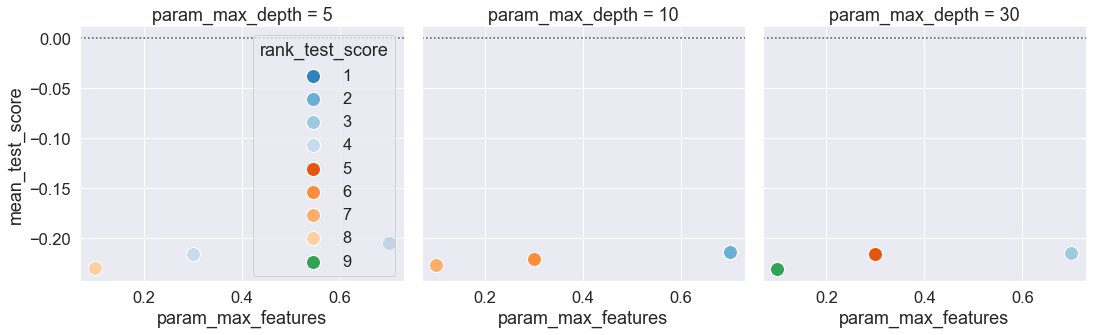

In [25]:



# Initialise Gridsearch CV with 5 fold cross-validation and root mse for socirn
def model_pipeline(model, param_grid, scoring):
    print("Creating GridSearchCV...")
    Tuned_Model = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    

    # Fit model & Time the process for training the model
    print("Fitting Model...")
    start_time = time.process_time()
    Tuned_Model.fit(x_train, Y_train)

    # End of fit time
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")

    return Tuned_Model

# Generate results of best run
def plot_mean_scores(Tuned_Model, col, x, y, name):
    Results = pd.DataFrame(Tuned_Model.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    # Initialize a grid of plots
    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")

    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=5,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="o", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)
    
    plt.show()

# Modelling - fitting the data to the model

# Build a decision tree
# Set paramters for Grid Search CV
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
}
model = DecisionTreeRegressor(criterion='squared_error', random_state=0)

Tuned_Model = model_pipeline(model, param_grid, "neg_root_mean_squared_error")
print("plotting mean scores...")

plot_mean_scores(
    Tuned_Model,
    ["param_max_depth"],
    "param_max_features",
    "mean_test_score",
    "DecisionTree",
)

In [40]:
# Make a prediction with the random forrest model

# Verify the data type
type(Test_encoded)

# Predict
# x_train = Train_encoded.drop(columns=["Id", "SalePrice", "SalePrice_log"])

predictions = Tuned_Model.predict(x_train)

print(predictions)

[12.18369216 12.02429171 12.18369216 ... 12.42230858 11.78734046
 11.9177644 ]
